<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**CONTESTO:** Rock o Hip-Hop? Applica metodi di machine learning per classificare i brani in generi musicali, senza doverli ascoltare :) 

**OBIETTIVO:** 

Utilizzando un set di dati composto da brani di due generi musicali (Hip-Hop e Rock), addestrerai un classificatore per distinguere tra i due generi in base solo alle informazioni sui brani derivate dai dati che hai a disposizione. Per prima cosa utilizzerai Pandas per analizzare i dati, aggregare informazioni (esempio utilizzare costrutti come il groupby) e creare grafici con Seaborn o MatplotLib.

Successivamente, utilizzerai la libreria scikit-learn per prevedere se puoi classificare correttamente il genere di una canzone in base a caratteristiche come energia, acustica, tempo, ballabilità etc..


**Dati a disposizione:**

Qui puoi trovare due fonti dati, uno in formato csv e l'altro in formato json.

https://drive.google.com/drive/folders/1vPd0qBCpWm_QEXM5NRynNrs72-pUuhSn?usp=sharing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import  plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
import plotly.express as px
sns.set()
ds_csv = pd.read_csv('dataset.csv', encoding='latin1')
metric_json = pd.read_json('metrics.json', encoding='latin1')

In [2]:
metric_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          13129 non-null  int64  
 1   acousticness      13129 non-null  float64
 2   danceability      13129 non-null  float64
 3   energy            13129 non-null  float64
 4   instrumentalness  13129 non-null  float64
 5   liveness          13129 non-null  float64
 6   speechiness       13129 non-null  float64
 7   tempo             13129 non-null  float64
 8   valence           13129 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [3]:
ds_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       17734 non-null  int64 
 1   bit_rate       17734 non-null  int64 
 2   comments       17734 non-null  int64 
 3   composer       166 non-null    object
 4   date_created   17734 non-null  object
 5   date_recorded  1898 non-null   object
 6   duration       17734 non-null  int64 
 7   favorites      17734 non-null  int64 
 8   genre_top      17734 non-null  object
 9   genres         17734 non-null  object
 10  genres_all     17734 non-null  object
 11  information    482 non-null    object
 12  interest       17734 non-null  int64 
 13  language_code  4089 non-null   object
 14  license        17714 non-null  object
 15  listens        17734 non-null  int64 
 16  lyricist       53 non-null     object
 17  number         17734 non-null  int64 
 18  publisher      52 non-null

In [4]:
ds_csv

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17729,155063,320000,0,NaN,2017-03-24 19:40:43,NaN,283,3,Hip-Hop,"[21, 811]",...,NaN,1283,NaN,Attribution,1050,NaN,4,NaN,"['old school beats', '2017 free instrumentals'...",Been On
17730,155064,320000,0,NaN,2017-03-24 19:40:44,NaN,250,2,Hip-Hop,"[21, 811]",...,NaN,1077,NaN,Attribution,858,NaN,2,NaN,"['old school beats', '2017 free instrumentals'...",Send Me
17731,155065,320000,0,NaN,2017-03-24 19:40:45,NaN,219,3,Hip-Hop,"[21, 811]",...,NaN,1340,NaN,Attribution,1142,NaN,1,NaN,"['old school beats', '2017 free instrumentals'...",The Question
17732,155066,320000,0,NaN,2017-03-24 19:40:47,NaN,252,6,Hip-Hop,"[21, 811]",...,NaN,2065,NaN,Attribution,1474,NaN,3,NaN,"['old school beats', '2017 free instrumentals'...",Roy


In [5]:
metric_json

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072
...,...,...,...,...,...,...,...,...,...
13124,124857,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461
13125,124862,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845
13126,124863,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667
13127,124864,0.327576,0.574426,0.548327,0.452867,0.075928,0.033388,142.009,0.569274


In [11]:
metric_json

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072
...,...,...,...,...,...,...,...,...,...
13124,124857,0.007592,0.790364,0.719288,0.853114,0.720715,0.082550,141.332,0.890461
13125,124862,0.041498,0.843077,0.536496,0.865151,0.547949,0.074001,101.975,0.476845
13126,124863,0.000124,0.609686,0.895136,0.846624,0.632903,0.051517,129.996,0.496667
13127,124864,0.327576,0.574426,0.548327,0.452867,0.075928,0.033388,142.009,0.569274


In [12]:
#creo un nuovo df mergiando metric_json con trackid e genretop 
df = ds_csv[["track_id","genre_top"]]
df = pd.merge(df, metric_json, on ='track_id', how ="inner")
#df.head()
df

,track_id,genre_top,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,Rock,0.988306,0.255661,0.979774,9.730057e-01,0.121342,0.051740,90.241,0.034018
1,154,Rock,0.970135,0.352946,0.023852,9.571129e-01,0.113261,0.032177,53.758,0.035632
2,155,Rock,0.981657,0.142249,0.912122,9.672940e-01,0.363510,0.087527,91.912,0.034325
3,169,Rock,0.989141,0.225978,0.722835,2.630763e-01,0.092371,0.053406,94.322,0.028347
4,170,Rock,0.886660,0.298518,0.744333,9.209505e-01,0.139587,0.088781,97.880,0.073548
...,...,...,...,...,...,...,...,...,...,...
4797,124718,Hip-Hop,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414
4798,124719,Hip-Hop,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720
4799,124720,Hip-Hop,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240
4800,124721,Hip-Hop,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553,171.329,0.580087


# Predictions

In [13]:
#split the data
X=df.drop(["genre_top","track_id"],axis=1)
y=df["genre_top"]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
2851,0.010487,0.251115,0.982086,0.830243,0.213312,0.079315,135.458,0.039423
3262,0.005969,0.347161,0.896387,0.000003,0.272978,0.032797,93.812,0.939504
4578,0.943028,0.516777,0.114157,0.963264,0.113841,0.038008,167.913,0.813471
1774,0.981615,0.529577,0.314415,0.970609,0.111988,0.027651,101.851,0.545937
1957,0.509788,0.379469,0.425417,0.944989,0.166501,0.028889,100.683,0.644653
...,...,...,...,...,...,...,...,...
4426,0.001396,0.701181,0.360302,0.785723,0.113794,0.060371,95.120,0.624838
466,0.771836,0.710007,0.697584,0.000078,0.196290,0.207293,87.410,0.750693
3092,0.413420,0.494204,0.655205,0.850368,0.150639,0.038676,138.798,0.837199
3772,0.000021,0.232832,0.947861,0.002208,0.396454,0.090599,139.143,0.241046


# Data normalization

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7
0,-1.288452,-1.018240,1.453729,0.603707,0.162978,-0.169291,0.264912,-1.555937
1,-1.300742,-0.491935,1.101457,-1.607798,0.558829,-0.494501,-0.962567,1.830329
2,1.248554,0.437509,-2.113919,0.958034,-0.496961,-0.458071,1.221495,1.356170
3,1.353533,0.507651,-1.290752,0.977597,-0.509255,-0.530477,-0.725625,0.349659
4,0.069911,-0.314901,-0.834477,0.909355,-0.147594,-0.521825,-0.760051,0.721048
...,...,...,...,...,...,...,...,...
3836,-1.313183,1.447993,-1.102133,0.485118,-0.497274,-0.301732,-0.924015,0.646498
3837,0.782821,1.496354,0.284274,-1.607597,0.050043,0.725410,-1.151261,1.119986
3838,-0.192260,0.313819,0.110072,0.657313,-0.252830,-0.453399,0.363356,1.445438
3839,-1.316924,-1.118431,1.313045,-1.601926,1.378030,-0.090402,0.373525,-0.797393


# Decision Tree

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8928199791883454

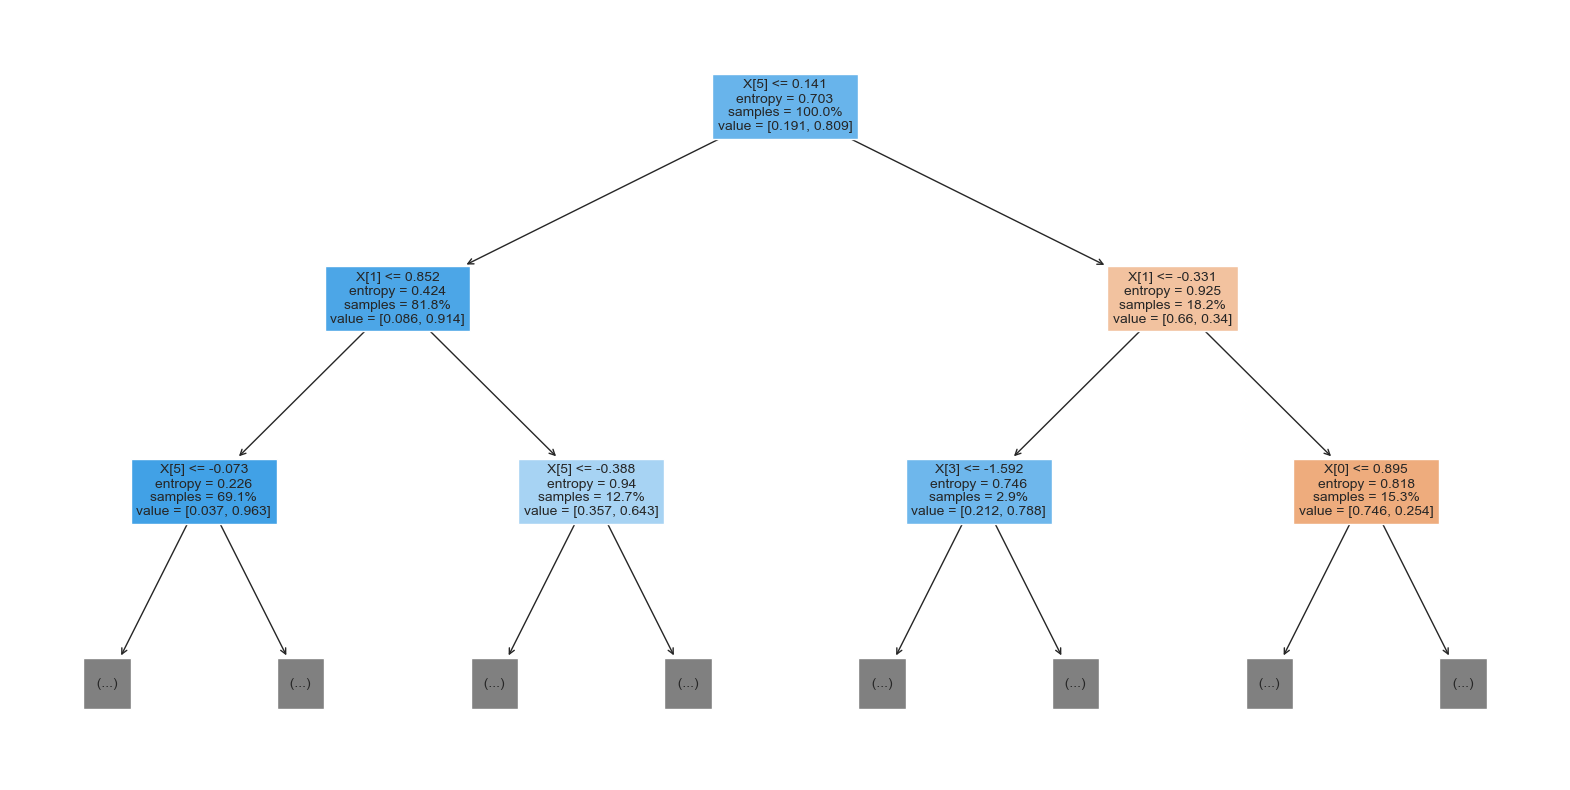

In [17]:
from sklearn.tree import plot_tree



f, ax = plt.subplots(1,1, figsize=(20, 10))

plot_tree(clf, ax=ax, fontsize=10, filled=True, proportion=True, max_depth=2)

plt.show()

# Knn Vs Decision Tree


In [18]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)
y_pred=neigh.predict(X_test)
accuracy_score(y_test, y_pred)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



0.9125910509885536

In [19]:
from sklearn.metrics import classification_report

modelli = [
DecisionTreeClassifier(criterion='entropy'),
KNeighborsClassifier(n_neighbors=10)
]



entries = []
for modello in modelli:
    nome_modello = modello.__class__.__name__
    clsffit = modello.fit(X_train,y_train)
    print('\t\tCLASSIFICATIION METRICS "{}":\n'.format(nome_modello))
    print(classification_report(y_test, modello.predict(X_test),
    target_names= df['genre_top'].unique()))





		CLASSIFICATIION METRICS "DecisionTreeClassifier":

              precision    recall  f1-score   support

        Rock       0.70      0.69      0.70       178
     Hip-Hop       0.93      0.93      0.93       783

    accuracy                           0.89       961
   macro avg       0.82      0.81      0.81       961
weighted avg       0.89      0.89      0.89       961

		CLASSIFICATIION METRICS "KNeighborsClassifier":

              precision    recall  f1-score   support

        Rock       0.78      0.74      0.76       178
     Hip-Hop       0.94      0.95      0.95       783

    accuracy                           0.91       961
   macro avg       0.86      0.84      0.85       961
weighted avg       0.91      0.91      0.91       961



/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

